<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/Rezky_dwi_putra_2226270013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Lakukan Pengolahan citra digital menggunakan Google Colab. Berikut adalah langkah-langkah yang harus dilakukan



In [1]:
# library
import urllib.request
import cv2
import matplotlib.pyplot as plt
import numpy as np

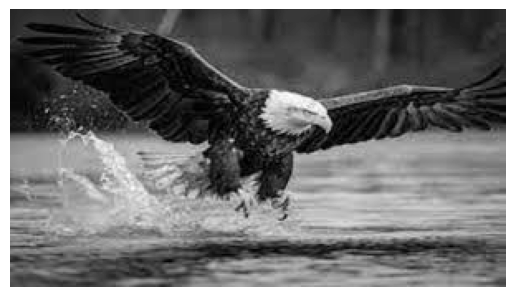

In [4]:
# Memuat Gambar Grayscale dari Link
Gambar1 = cv2.imread('Gambar.jpg',cv2.IMREAD_GRAYSCALE)

# Memanggil Hasil gambar Grayscale
plt.imshow(Gambar1, cmap='gray')
plt.axis('off')
plt.show()

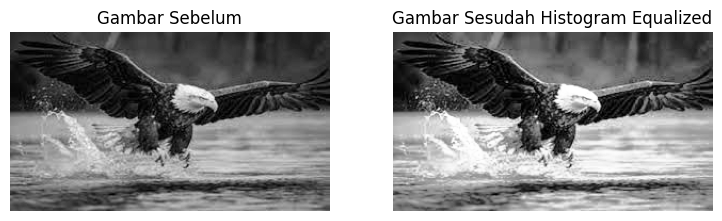

In [5]:
# Karena 'Gambar' sudah berskala abu-abu, langsung tetapkan ke gray_Gambar:
gray_Gambar = Gambar1

# Lakukan pemerataan histogram
equalized_image = cv2.equalizeHist(gray_Gambar)

# Menampilkan gambar asli dan yang disamakan
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(gray_Gambar, cmap='gray')
plt.title('Gambar Sebelum')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Gambar Sesudah Histogram Equalized')
plt.axis('off')

plt.show()

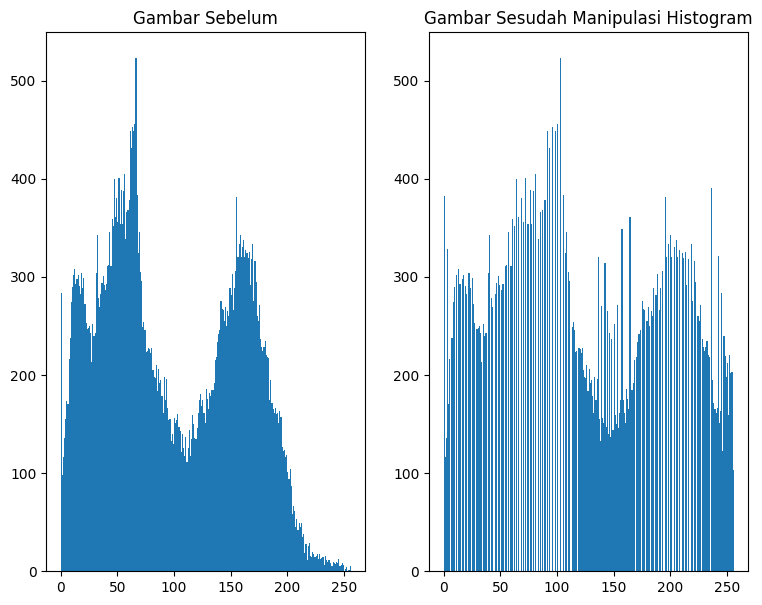

In [6]:
# Hitung dan plot histogram
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.hist(gray_Gambar.ravel(), 256, [0, 256])
plt.title('Gambar Sebelum')

plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Gambar Sesudah Manipulasi Histogram')

plt.show()

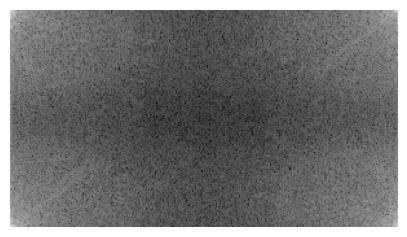

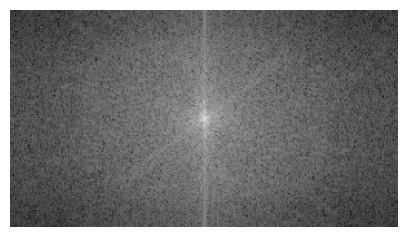

In [20]:
# mengubah gambar ke domain frekuensi, f --> F
f = Gambar1
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

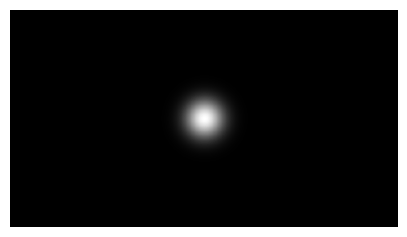

In [22]:
# Buat Filter Gaussian: Filter Lolos Rendah
f = Gambar1
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

2.   Lakukan Pengolahan citra digital meggunakan Google Colab, Berikut adalah langkah-langkah yang harus dilakukan:



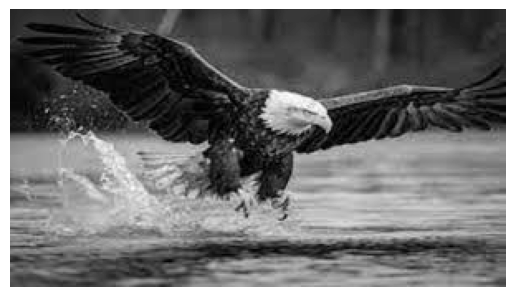

In [24]:
# Memuat Gambar Grayscale dari Link
Gambar2 = cv2.imread('Gambar.jpg',cv2.IMREAD_GRAYSCALE)

# Memanggil Hasil gambar Grayscale
plt.imshow(Gambar2, cmap='gray')
plt.axis('off')
plt.show()

([], [])

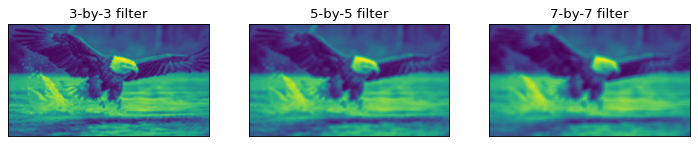

In [39]:
# Spatial Filtering
# Mendefinisikan kernel menggunakan numpy.

kernel_3 = np.ones((3,3),np.float32)/9
kernel_5 = np.ones((5,5),np.float32)/25
kernel_7 = np.ones((7,7),np.float32)/49

# Menggabungkan citra dengan kernel.
# -1 berarti pusat kernel terletak pada piksel tengah.
# membandingkan dua ukuran kernel.

filtered_3 = cv2.filter2D(ref,-1,kernel_3)
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_7 = cv2.filter2D(ref,-1,kernel_7)

# plot hasil dalam dua subplot.
fig=plt.figure(figsize=(11, 11), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(131), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(133), plt.imshow(filtered_7), plt.title('7-by-7 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

Perbedaannya 3x3 masih tampak jelas dimana nilai fikselnya masih tampak rendah dibandingkan 5x5 yang dimana mulai tampak buram dengan nilai fiksel yang mulai tinggi begitupun dengan 7x7 yang tampak lebih buram dari 5x5